C:\Users\DHRUV\AppData\Local\Temp\ipykernel_26600\393259749.py:18: RuntimeWarning: overflow encountered in scalar power
  x_new = 1 - a * x**2 + y


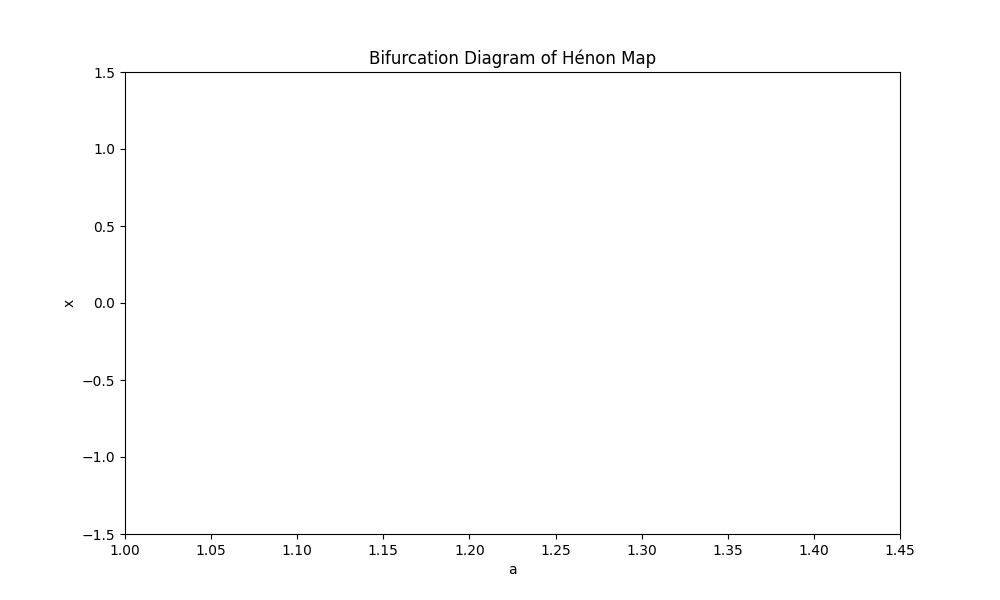

In [ ]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
b = 0.3
a_values = np.linspace(1.0, 1.45, 500)
iterations = 1000
last = 100

data = []
for a in a_values:
    x, y = 0.1, 0.1
    temp = []
    for i in range(iterations):
        x_new = 1 - a * x**2 + y
        y_new = b * x
        x, y = x_new, y_new
        if i >= (iterations - last):
            temp.append(x)
    data.append((a, temp))

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(min(a_values), max(a_values))
ax.set_ylim(-1.5, 1.5)
ax.set_title("Bifurcation Diagram of Hénon Map")
ax.set_xlabel("a")
ax.set_ylabel("x")

a_all, x_all, c_all = [], [], []
sc = ax.scatter([], [], s=0.2, c=[], cmap='plasma', alpha=0.8, vmin=0, vmax=len(data))

def update(frame):
    if frame >= len(data):
        return sc,

    a, x_vals = data[frame]
    a_all.extend([a] * len(x_vals))
    x_all.extend(x_vals)
    c_all.extend([frame] * len(x_vals))  

    sc.set_offsets(np.column_stack((a_all, x_all)))
    sc.set_array(np.array(c_all))  
    sc.set_clim(0, len(data))      

    return sc,

ani = FuncAnimation(fig, update, frames=len(data), interval=10, blit=False, repeat=False)
plt.show()
